In [31]:
##########################################################################################
# ProjectGF
# AUTHOR: RUSLAN MASINJILA
##########################################################################################
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import numpy as np
import time
import os

import winsound
duration = 100
freq     = 1000

# NUMBER OF COLUMNS TO BE DISPLAYED
pd.set_option('display.max_columns', 500)

# MAXIMUM TABLE WIDTH TO DISPLAY
pd.set_option('display.width', 1500)      
 
# ESTABLISH CONNECTION TO MT5 TERMINAL
if not mt5.initialize():
    print("initialize() FAILED, ERROR CODE =",mt5.last_error())
    quit()

In [32]:
# MT5 TIMEFRAME
MN1  = mt5.TIMEFRAME_MN1
W1  = mt5.TIMEFRAME_W1
D1  = mt5.TIMEFRAME_D1
H12 = mt5.TIMEFRAME_H12
H8  = mt5.TIMEFRAME_H8
H6  = mt5.TIMEFRAME_H6
H4  = mt5.TIMEFRAME_H4
H3  = mt5.TIMEFRAME_H3
H2  = mt5.TIMEFRAME_H2
H1  = mt5.TIMEFRAME_H1
M30 = mt5.TIMEFRAME_M30
M20 = mt5.TIMEFRAME_M20
M15 = mt5.TIMEFRAME_M15
M12 = mt5.TIMEFRAME_M12
M10 = mt5.TIMEFRAME_M10
M6  = mt5.TIMEFRAME_M6
M5  = mt5.TIMEFRAME_M5
M4  = mt5.TIMEFRAME_M4
M3  = mt5.TIMEFRAME_M3
M2  = mt5.TIMEFRAME_M2
M1  = mt5.TIMEFRAME_M1

currency_pairs = None
with open('instruments.txt') as f:
    currency_pairs = [line.rstrip('\n') for line in f]


# TIMEFRAMES
mt5Timeframe   = [M1,M2,M3,M4,M5,M6,M10,M12,M15,M20,M30,H1,H2,H3,H4,H6,H8,H12,D1]
strTimeframe   = ["M1","M2","M3","M4","M5","M6","M10","M12","M15","M20","M30","H1","H2","H3","H4","H6","H8","H12","D1"]

numCandles     = 1000
offset         = 1

EMARainbowSignals   = []

mt5Timeframe   = [M1]
strTimeframe   = ["M1"]
currency_pairs = ["EURUSD"]
##########################################################################################

In [33]:
def getSignals(rates_frame,strTimeframe):
    
    rates_frame["median"] = (rates_frame["high"]+rates_frame["low"])/2
    ema50 = ta.ema(rates_frame["median"],length=50).tail(1).item()
    ema45 = ta.ema(rates_frame["median"],length=45).tail(1).item()
    ema40 = ta.ema(rates_frame["median"],length=40).tail(1).item()
    ema35 = ta.ema(rates_frame["median"],length=35).tail(1).item()
    ema30 = ta.ema(rates_frame["median"],length=30).tail(1).item()
    ema25 = ta.ema(rates_frame["median"],length=25).tail(1).item()
    ema20 = ta.ema(rates_frame["median"],length=20).tail(1).item()
    

    '''
    rsi50 = ta.rsi(rates_frame["close"],length=50).tail(1).item()
    rsi45 = ta.rsi(rates_frame["close"],length=45).tail(1).item()
    rsi40 = ta.rsi(rates_frame["close"],length=40).tail(1).item()
    rsi35 = ta.rsi(rates_frame["close"],length=35).tail(1).item()
    rsi30 = ta.rsi(rates_frame["close"],length=30).tail(1).item()
    rsi25 = ta.rsi(rates_frame["close"],length=25).tail(1).item()
    rsi20 = ta.rsi(rates_frame["close"],length=20).tail(1).item()
    
    if(rsi50<rsi45 and rsi45<rsi40 and rsi40<rsi35 and rsi35<rsi30 and rsi30<rsi25 and rsi25<rsi20):
        EMARainbowSignals.append("BUY "+strTimeframe+" |")
        return
        
    if(rsi50>rsi45 and rsi45>rsi40 and rsi40>rsi35 and rsi35>rsi30 and rsi30>rsi25 and rsi25>rsi20):
        EMARainbowSignals.append("SELL "+strTimeframe+" |")
        return
    '''
        

In [34]:
# Gets the most recent <numCandles> prices for a specified <currency_pair> and <mt5Timeframe>
# Excludes the bar that has not finished forming <i.e offset = 1>
def getRates(currency_pair, mt5Timeframe, numCandles):
    rates_frame =  mt5.copy_rates_from_pos(currency_pair, mt5Timeframe, offset, numCandles)
    rates_frame = pd.DataFrame(rates_frame)
    return rates_frame

##########################################################################################

##############################
           SIGNALS            
##############################
[EURUSD]



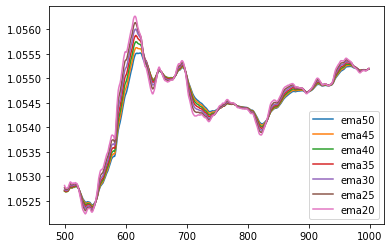

In [35]:
banner = ""
banner+="##############################\n"
banner+="           SIGNALS            \n"
banner+="##############################\n"
lst = [1]
for i in lst:
    
    display = banner
    for cp in currency_pairs:
        display+="["+cp+"]"+"\n"
        EMARainbowSignals =[]
        for t in range(len(mt5Timeframe)):
            rates_frame = getRates(cp, mt5Timeframe[t], numCandles)
            getSignals(rates_frame,strTimeframe[t])
        if(len(EMARainbowSignals)>0):
            display+=" ".join(EMARainbowSignals)+"\n"
            winsound.Beep(freq, duration)

        display+="==============================\n"
    print(display)
    time.sleep(60)
    os.system('cls' if os.name == 'nt' else 'clear')